In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Cases/Wisconsin/BreastCancer.csv')
df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [3]:
df.isnull().sum()

Code             0
Clump            0
UniCell_Size     0
Uni_CellShape    0
MargAdh          0
SEpith           0
BareN            0
BChromatin       0
NoemN            0
Mitoses          0
Class            0
dtype: int64

In [16]:
X = df.iloc[:, 1:-1]
X

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
0,5,4,3,1,2,2,2,3,1
1,9,1,2,6,4,10,7,7,2
2,10,4,7,2,2,8,6,1,1
3,6,10,10,10,8,10,7,10,7
4,1,1,1,1,2,5,5,1,1
...,...,...,...,...,...,...,...,...,...
694,10,10,10,10,5,10,10,10,7
695,5,10,10,10,4,10,5,6,3
696,5,1,1,1,2,1,3,2,1
697,4,1,1,1,1,1,2,1,1


In [17]:
y = df['Class']
y

0         Benign
1      Malignant
2      Malignant
3      Malignant
4         Benign
         ...    
694    Malignant
695    Malignant
696       Benign
697       Benign
698       Benign
Name: Class, Length: 699, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear')
lor.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [36]:
y_pred = lor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9828571428571429

### Stratified K Fold

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lor = LogisticRegression()

results = cross_val_score(lor, X, y, cv=kfold)  # scoring='acc_score' by default
results.mean()

0.9613977389516958

In [43]:
results = cross_val_score(lor, X, y, scoring='neg_log_loss', cv=kfold)
results.mean()

-0.10048237864728342

### Grid Search CV

In [50]:
from sklearn.model_selection import GridSearchCV

lor = LogisticRegression(max_iter=200)
params = {'penalty':['l1','l2','elasticnet',None],
          'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
          'l1_ratio': np.arange(0,1)}

In [51]:
# Default scoring=acc score
gcv = GridSearchCV(lor, param_grid=params,
                   cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/

{'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
0.9642651593011304


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages

In [52]:
# log loss
gcv = GridSearchCV(lor, param_grid=params,
                   cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dai/

{'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
-0.09891661103452001


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages

In [55]:
best_model = gcv.best_estimator_
print(best_model.coef_)
print(gcv.best_params_)

[[0.45374294 0.05388446 0.30702376 0.19684591 0.03002977 0.39160169
  0.34224516 0.14109174 0.38310345]]
{'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}


In [57]:
best_model.fit(X_train, y_train)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


LogisticRegression(l1_ratio=0, max_iter=200, penalty='l1', solver='liblinear')

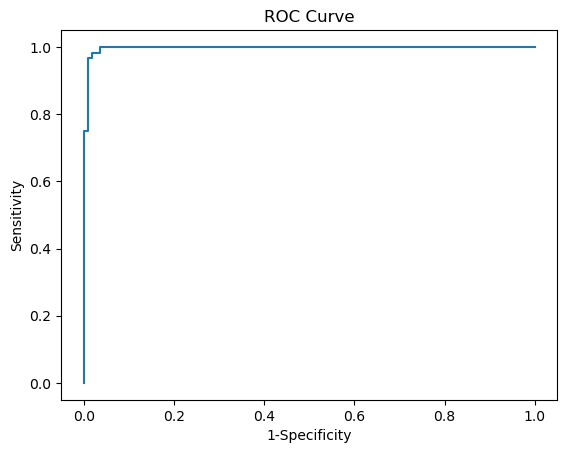

0.9972463768115941


In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr, tpr, thres = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.ylabel("Sensitivity")
plt.xlabel("1-Specificity")
plt.show()

### AUC
print(roc_auc_score(y_test, y_pred_prob))

In [60]:
best_model.predict_proba(X_test)

array([[2.73247682e-04, 9.99726752e-01],
       [8.68336682e-01, 1.31663318e-01],
       [9.93817372e-01, 6.18262805e-03],
       [1.91488308e-04, 9.99808512e-01],
       [9.89515762e-01, 1.04842376e-02],
       [9.95516759e-01, 4.48324077e-03],
       [8.18664808e-03, 9.91813352e-01],
       [9.91479340e-01, 8.52066033e-03],
       [1.87134854e-03, 9.98128651e-01],
       [9.71530553e-01, 2.84694471e-02],
       [8.77120835e-01, 1.22879165e-01],
       [9.63172341e-01, 3.68276588e-02],
       [4.19302998e-03, 9.95806970e-01],
       [9.49830555e-01, 5.01694446e-02],
       [9.89515762e-01, 1.04842376e-02],
       [9.89515762e-01, 1.04842376e-02],
       [1.77239114e-03, 9.98227609e-01],
       [3.76844136e-02, 9.62315586e-01],
       [9.85043165e-01, 1.49568347e-02],
       [9.08758379e-01, 9.12416205e-02],
       [9.54590373e-01, 4.54096266e-02],
       [9.95516759e-01, 4.48324077e-03],
       [5.24629490e-03, 9.94753705e-01],
       [9.93817372e-01, 6.18262805e-03],
       [9.617960